In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv("train.csv")

In [3]:
len(df.columns)

81

In [4]:
GrLivArea=df['GrLivArea']
SalePrice=df['SalePrice']


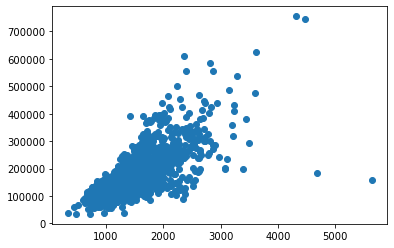

In [5]:
plt.scatter(GrLivArea,SalePrice)

In [6]:
def removeOutliers(df,columns,n_std):
    for col in columns:
        if df[col].dtypes==int or df[col].dtypes== float:
            mean=df[col].mean()
            sd=df[col].std()
            df = df[(df[col] <= mean+(n_std*sd))]

    return df

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
columnName=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
df=removeOutliers(df,columnName,3)

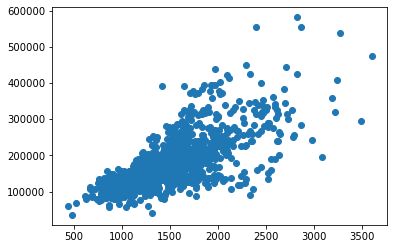

In [9]:
plt.scatter(df.GrLivArea,df.SalePrice)

(array([ 14., 190., 283., 280., 192.,  61.,  45.,  12.,   6.,   2.]),
 array([ 438.,  755., 1072., 1389., 1706., 2023., 2340., 2657., 2974.,
        3291., 3608.]),
 <BarContainer object of 10 artists>)

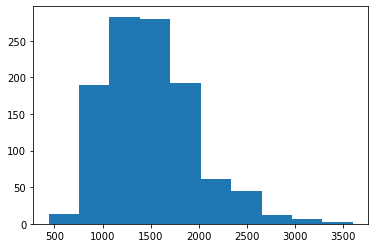

In [10]:
plt.hist(df.GrLivArea)

(array([ 46., 371., 345., 164.,  80.,  48.,  20.,   6.,   1.,   4.]),
 array([ 35311. ,  90073.2, 144835.4, 199597.6, 254359.8, 309122. ,
        363884.2, 418646.4, 473408.6, 528170.8, 582933. ]),
 <BarContainer object of 10 artists>)

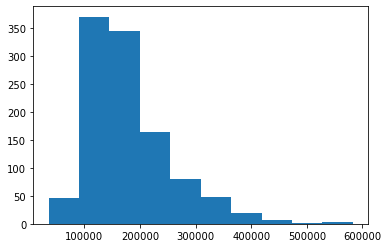

In [11]:
plt.hist(df.SalePrice)

In [12]:
temp= df.isna().sum().apply(lambda a : a>1)

In [54]:
x=pd.DataFrame(df['GrLivArea'])

In [55]:
y=pd.DataFrame(df['SalePrice'])

In [56]:
x

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198
...,...
1455,1647
1456,2073
1457,2340
1458,1078


In [57]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [58]:
X_train = x[:-20]
X_test = x[-20:]
Y_train = y[:-20]
Y_test = y[-20:]


In [59]:
len(Y_train)

1065

In [60]:
len(Y_test)

20

In [61]:
regr = linear_model.LinearRegression()


In [62]:
regr.fit(X_train, Y_train)


LinearRegression()

In [63]:
y_pred = regr.predict(X_test)


In [64]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [[111.29606205]]


In [65]:
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))

Mean squared error: 3046770804.78


In [66]:
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

Coefficient of determination: 0.38


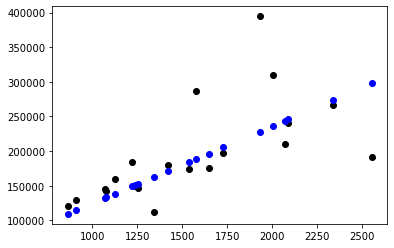

In [67]:
plt.scatter(X_test, Y_test, color="black")
plt.scatter(X_test, y_pred, color="blue")
plt.show()

In [68]:
numeric_features = df.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10

SalePrice       1.000000
OverallQual     0.806796
GrLivArea       0.702860
GarageCars      0.645750
TotalBsmtSF     0.642857
GarageArea      0.623127
1stFlrSF        0.616444
FullBath        0.563622
YearRemodAdd    0.550364
YearBuilt       0.547741
Name: SalePrice, dtype: float64 



In [69]:
x=df[['GrLivArea','OverallQual']]

In [70]:
y=df[['SalePrice']]

In [73]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [76]:
regressor = LinearRegression()

In [77]:
regressor.fit(X_train, y_train)


LinearRegression()

In [78]:
y_pred = regressor.predict(X_test)
len(y_pred)

217

In [79]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 1365529563.08


In [80]:
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.72


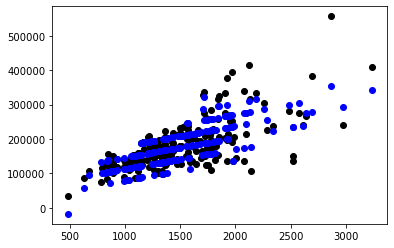

In [81]:
plt.scatter(X_test.iloc[:,0].values, y_test, color="black")
plt.scatter(X_test.iloc[:,0].values, y_pred, color="blue")
plt.show()